# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Setiawan Ariansyah
- Email: ariansyahsetiawan818@gmail.com
- Id Dicoding: 


## Menentukan Pertanyaan Bisnis

Dataset "Bike Sharing" adalah kumpulan data yang memuat rental sepeda dalam jam dan harian pada tahun 2011 dan 2012. Selain itu, dataset ini juga memuat karakteristik cuaca dan musim. Sistem peminjaman sepeda merupakan cara baru dalam menyewa sepeda dimana semua proses baik dari berlangganan, menyewa, dan mengembalikan sepeda dilakukan secara otomatis. Dengan cara ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikan kembali di posisi lainnya. 
Dataset peminjaman sepeda ini ditujukan untuk melihat karakteristik peminjaman seperti durasi lama meminjam, posisi berangkat, hingga posisi mengembalikan. Selain itu, diharapkan melalui dataset ini dapat melihat mobilitas pada saat peristiwa penting di kota.

Dari pendahuluan tersebut, dirumuskan beberapa pertanyaan bisnis yaitu: 
- Bagaimana gambaran umum penyewaan sepeda berdasarkan musim?
- Bagaimana gambaran umum penyewaan sepeda berdasarkan waktu peminjaman?
- Bagaimana gambaran umum penyewaan pada saat beragam kondisi cuaca?
- Serta bagaimana gambaran umum penyewaan sepeda pada saat hari kerja dan hari libur?

Dari pertanyaan tersebut, tujuan dari analisis ini adalah:
- Mengetahui gambaran umum penyewaan sepeda berdasarkan musim.
- Mengetahui gambaran umum penyewaan sepeda berdasarkan waktu peminjaman.
- Mengetahui gambaran umum penyewaan pada saat beragam kondisi cuaca.
- Serta mengetahui gambaran umum penyewaan sepeda pada saat hari kerja dan hari libur.

## Menyaipkan semua library yang dibuthkan

In [42]:
# Import library
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
# Dataset jam
df_hour = pd.read_csv("D:/Kuliah/NonSTIS/Programming/Python/Bike-sharing-dataset/hour.csv")

# Ukuran dataset
print(df_hour.shape)

# Menampilkan dataset
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Dataset harian
df_day = pd.read_csv("D:/Kuliah/NonSTIS/Programming/Python/Bike-sharing-dataset/day.csv")

# Ukuran dataset
print(df_day.shape)

# Menampilkan dataset
df_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Menggabungkan dataframe harian dan jam
df_bikesharing = df_day.merge(df_hour, on="dteday", suffixes=('_daily', '_hourly'))
print(df_bikesharing.shape)

(17379, 32)


In [6]:
# Mencari dateday yang null
df_bikesharing.loc[df_bikesharing["dteday"].isnull()]

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily,instant_hourly,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly


Terlihat bahwa tidak ada baris yang tidak memiliki tanggal.

In [7]:
# Menampilkan dataframe merge
df_bikesharing.head(10)

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily,instant_hourly,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,10,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

Pada bagian ini akan dilakukan pemeriksaan terhadap dataset sebelum dilakukan analisis data lebih lanjut. Hal-hal yang akan diperhatikan diantaranya adalah tipe data, missing value, duplikat data, dan statistik.

#### Data Jam

In [8]:
# Tipe data
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kesimpulan: Semua kolom bertipe data sesuai kecuali dteday yang seharusnya datetime.

In [9]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulan: Tidak ada missing value pada dataset.

In [10]:
# Data duplikat
print("Jumlah duplikasi", df_hour.duplicated().sum() )

Jumlah duplikasi 0


In [11]:
# Statistik
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Kesimpulan: Tidak ada keanehan dalam parameter statistik yang terdapat pada dataset.

#### Data Harian

In [12]:
# Tipe data
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kesimpulan: Semua kolom bertipe data sesuai kecuali dteday yang seharusnya datetime.

In [13]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulan: Tidak ada missing value pada dataset.

In [14]:
# Data duplikat
print("Jumlah duplikasi", df_day.duplicated().sum() )

Jumlah duplikasi 0


In [15]:
# Statistik
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Kesimpulan: Tidak ada keanehan dalam parameter statistik yang terdapat pada dataset.

#### Data Gabungan

In [16]:
# Tipe data
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

Kesimpulan: Semua kolom bertipe data sesuai kecuali dteday yang seharusnya datetime.

In [17]:
df_bikesharing.isna().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

Kesimpulan: Tidak ada missing value pada dataset.

In [18]:
# Data duplikat
print("Jumlah duplikasi", df_bikesharing.duplicated().sum() )

Jumlah duplikasi 0


In [19]:
# Statistik
df_bikesharing.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily,instant_hourly,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Kesimpulan: Tidak ada keanehan dalam parameter statistik yang terdapat pada dataset.

### Cleaning Data

Pada tahapan ini akan dilakukan pembersihan terhadap dataset sekaligus akan dilakukan penyesuaian tipe data. Oleh karena tidak ada data anomali maka hanya akan dilakukan penyesuaian terhadap kolom dteday menjadi datetime.

In [20]:
# Mengubah tipe data
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_bikesharing["dteday"] = pd.to_datetime(df_bikesharing["dteday"])

# Mengecek kembali tipe data
df_hour["dteday"].info()
df_day["dteday"].info()
df_bikesharing["dteday"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


## Exploratory Data Analysis (EDA)

### Explorasi Data Sewa Berdasarkan Hari dan musim

In [21]:
df_bikesharing.groupby(by="season_daily").agg({
    "workingday_daily": "count",
    "windspeed_daily": ["max", "min", "mean"]
}).sort_values(by=("workingday_daily", "count"), ascending=False)

workingday_daily windspeed_daily                    
                        count             max       min      mean
season_daily                                                     
3                        4496        0.375617  0.064071  0.171593
2                        4409        0.388067  0.065929  0.203410
1                        4242        0.507463  0.045408  0.215107
4                        4232        0.422275  0.022392  0.170819

### Explorasi Data Sewa Berdasarkan jam dan musim

In [22]:
df_bikesharing.groupby(by="season_hourly").agg({
    "workingday_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean"]
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly windspeed_hourly               
                          count              max  min      mean
season_hourly                                                  
3                          4496           0.8507  0.0  0.171593
2                          4409           0.7164  0.0  0.203410
1                          4242           0.8060  0.0  0.215107
4                          4232           0.6418  0.0  0.170819

In [23]:
df_bikesharing.groupby(by="season_daily").mnth_daily.nunique()

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

Kesimpulan: Menunjukkan jumlah penyewaan harian berdasarkan bulan pada tiap musim.

In [24]:
df_bikesharing.groupby(by="season_daily").instant_daily.nunique()

season_daily
1    181
2    184
3    188
4    178
Name: instant_daily, dtype: int64

Kesimpulan: Menunjukkan jumlah penyewaan sepeda berdasarkan musim tiap harinya.

In [25]:
df_bikesharing.groupby(by="season_daily").cnt_daily.nunique()

season_daily
1    179
2    182
3    188
4    176
Name: cnt_daily, dtype: int64

Kesimpulan: Menunjukkan jumlah pengguna sepeda per hari berdasarkan musim.

In [26]:
df_bikesharing.groupby(by="season_daily").cnt_hourly.nunique()

season_daily
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

Kesimpulan: Menunjukkan jumlah pengguna sewa sepeda per hari berdasarkan musim.

In [27]:
df_bikesharing.groupby(by="weathersit_daily").cnt_hourly.nunique()

weathersit_daily
1    841
2    686
3    187
Name: cnt_hourly, dtype: int64

Kesimpulan: Menunjukkan berdasarkan beberapa kondisi cuaca per jam berapa banyak pengguna yang menyewa sepeda.

In [28]:
df_bikesharing.groupby(by="weathersit_daily").cnt_daily.nunique()

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

Kesimpulan: Menunjukkan berdasarkan beberapa kondisi cuaca per hari berapa banyak pengguna yang menyewa sepeda.

In [29]:
numerical_columns = ["holiday_daily", "weekday_daily", "workingday_daily", "weathersit_daily", "temp_daily", "atemp_daily", "season_daily", "windspeed_daily", "cnt_daily"]
print(df_bikesharing[numerical_columns].corr())

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

1. Bagaimana gambaran umum penyewaan sepeda berdasarkan musim?

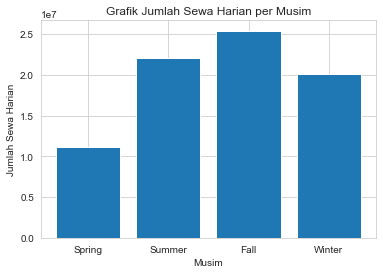

In [43]:
seasonal_data = df_bikesharing.groupby(by="season_daily").cnt_daily.sum()
season_names = ["Spring", "Summer", "Fall", "Winter"]
plt.bar(season_names, seasonal_data)
plt.xlabel("Musim")
plt.ylabel("Jumlah Sewa Harian")
plt.title("Grafik Jumlah Sewa Harian per Musim")
plt.show()

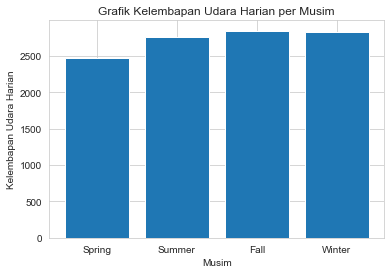

In [44]:
seasonal_data = df_bikesharing.groupby(by="season_daily").hum_daily.sum()
season_names = ["Spring", "Summer", "Fall", "Winter"]
plt.bar(season_names, seasonal_data)
plt.xlabel("Musim")
plt.ylabel("Kelembapan Udara Harian")
plt.title("Grafik Kelembapan Udara Harian per Musim")
plt.show()

In [32]:
df_bikesharing.groupby(by="season_daily").agg({
    "hum_daily": "mean",
    "temp_daily": "mean",
    "windspeed_daily": "mean"
})

,hum_daily,temp_daily,windspeed_daily
season_daily,,,
1,0.581348,0.299147,0.215107
2,0.627022,0.544663,0.203410
3,0.633167,0.706410,0.171593
4,0.667124,0.423138,0.170819


Kesimpulan: Dari grafik diatas terlihat bahwa pengguna lebih banyak melakukan peminjaman sepeda pada musim gugur dan musim panas. Sedangkan jumlah peminjaman sepeda terendah di musim gugur. Musim panas dan musim gugur memiliki rentang nilai kelembapan yang normal sehingga pada sebagian besar orang akan nyaman untuk melakukan aktivitas diluar rumah. Dibandingkan dengan musim dingin dengan humiditas yg tinggi akan berbahaya untuk bersepeda dikarenakan jalanan yang licin. Hal ini jug berlaku untuk musim semi dengan humiditas yg kurang menandakan suasana yg kering. Jika dilihat dari suhu, maka secara rata-rata suhu cukup tinggi.

### Pertanyaan 2: 

2. Bagaimana gambaran umum penyewaan sepeda berdasarkan waktu peminjaman?

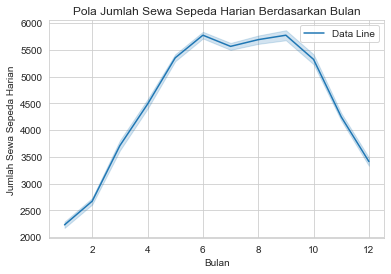

In [45]:
# Pola Berdasarkan Bulan
sns.lineplot(x=df_bikesharing['mnth_daily'], y=df_bikesharing['cnt_daily'], label="Data Line")
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

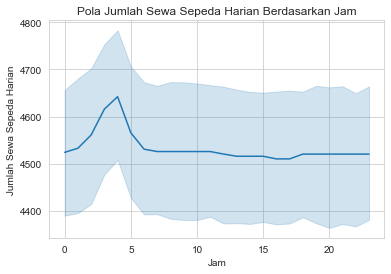

In [48]:
# Pola Berdasarkan Harian
sns.lineplot(x="hr", y="cnt_daily", data=df_bikesharing)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Kesimpulan: Berdasarkan bulan, jumlah sepeda harian terjadi kenaikan pada bulan keenam hingga kesepuluh. Setelah itu terjadi penurunan jumlah sewa sepeda harian. Hal ini sejalan dengan temuan di tujuan pertama bahwa pada musim dingin orang-orang menghindari kegiatan diluar karena keadaan.

### Pertanyaan 3:

3. Bagaimana gambaran umum penyewaan pada saat beragam kondisi cuaca?

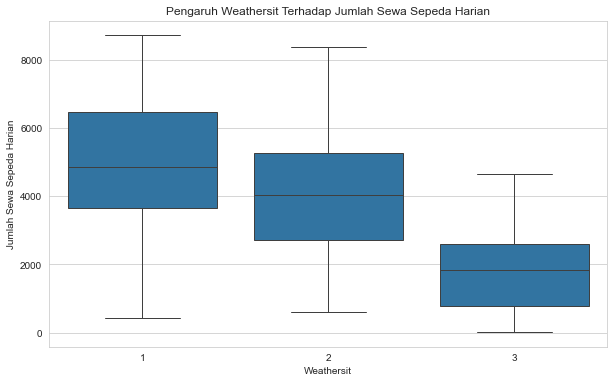

In [49]:
# Pengaruh Weathersit
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit_daily", y="cnt_daily", data=df_bikesharing)
plt.title("Pengaruh Kondisi Cuaca Terhadap Jumlah Sewa Sepeda Harian")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Kesimpulan: Dari boxplot terlihat bahwa terdapat perbedaan rata-rata dari ketiga keadaan cuaca pada terhadap jumlah sewa harian. Ditemukan juga kenyataan bahwa tidak ada penyewaan sepeda yang dilakukan pada saat kondisi hujan deras, palet es, badai petir, kabut, dan salju serta kabut.

### Pertanyaan 4:

4. Bagaimana gambaran umum penyewaan sepeda pada saat hari kerja dan hari libur?

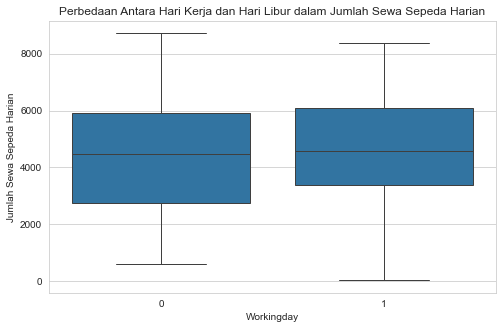

In [50]:
# Perbandingan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=df_bikesharing)
plt.title("Perbedaan Antara Hari Kerja dan Hari Libur dalam Jumlah Sewa Sepeda Harian")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Kesimpulan: Tidak terdapat perbedaan yang berarti dari hari kerja dan hari libur dalam jumlah sewa harian sepeda jika dilihat secara rata-rata penyewaan. Sedangkan jika dilihat dari jumlah lebih banyak penyewaan pada saat hari kerja dibandingkan dengan hari libur.

#### Clustering dengan K-Means

In [100]:
from sklearn.cluster import KMeans
clustering = pd.DataFrame()
#clustering["instant"] =  df_bikesharing["instant_hourly"]
clustering["kelembapan"] = df_bikesharing["hum_daily"]
clustering["temperatur"] =  df_bikesharing["temp_daily"]
clustering.head(10)

,kelembapan,temperatur
0,0.805833,0.344167
1,0.805833,0.344167
2,0.805833,0.344167
3,0.805833,0.344167
4,0.805833,0.344167
5,0.805833,0.344167
6,0.805833,0.344167
7,0.805833,0.344167
8,0.805833,0.344167
9,0.805833,0.344167


In [101]:
# Menjalankan K-means dengan 2 kelompok
import random
random.seed(42)
kmeans = KMeans(n_clusters=2, random_state=42)
clustering['Cluster'] = kmeans.fit_predict(clustering)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


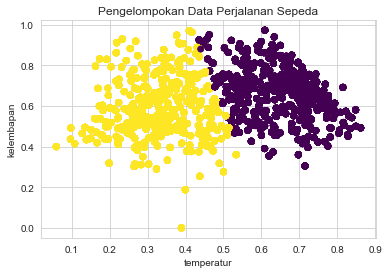

In [102]:
# Visualisasi hasil
plt.scatter(clustering["temperatur"], clustering["kelembapan"], c=clustering['Cluster'], cmap='viridis')
plt.title('Pengelompokan Data Perjalanan Sepeda')
plt.xlabel('temperatur')
plt.ylabel('kelembapan')
plt.show()

Kesimpulan: Terlihat terdapat dua kelompok besar dalam pengelompokan penyewaan sepeda berdasarkan kriteria kelembapan dan temperatur dengan metode K-Means.

## Conclusion

- Berdasarkan musim, jumlah penyewaan sepeda lebih banyak pada musim gugur dan musim panas. Hal ini disebabkan oleh faktor humiditas (Kelembapan), Temperatur, dan Kecepatan Angin.
- Berdasarkan bulan, jumlah sepeda harian terjadi kenaikan pada bulan keenam hingga kesepuluh. Setelah itu terjadi penurunan jumlah sewa sepeda harian. Hal ini sejalan dengan temuan di tujuan pertama bahwa pada musim dingin orang-orang menghindari kegiatan diluar karena keadaan.
- Berdasarkan jam, jumlah sepeda harian lebih banyak dilakukan pada pagi hari dan sore hari.
- Penyewaan sepeda lebih banyak dilakukan pada saat cuaca cerah, sedikit berawan, dan berawan sebagian. Serta tidak ada penyewaan sepeda pada saat kondisi ekstrem.
- Tidak ada perbedaan signifikan antara rata-rata peminjaman pada saat hari kerja dibandingkan dengan hari libur sedangkan secara jumlah lebih banyak saat hari kerja. Hal ini dapat disebabkan karena penyewaan sepeda dilakukan untuk mobilitas ke tempat kerja.

In [105]:
df_bikesharing.to_csv("data_gabung.csv", index=False)

In [108]:
df_bikesharing.head()
df_bikesharing.groupby(by="season_hourly").cnt_hourly.sum()

season_hourly
1     471348
2     918589
3    1061129
4     841613
Name: cnt_hourly, dtype: int64